# Expenses Report

Courtesy of David Doowat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv('expenses-1.CSV')

In [3]:
data1.head()

,Transaction Date,Post Date,Description,Category,Type,Amount,Memo
0,05/29/2021,05/31/2021,MEIJER # 182,Groceries,Sale,-15.58,NaN
1,05/30/2021,05/31/2021,BLUE GOOSE SUPERMAR,Groceries,Sale,-108.97,NaN
2,05/30/2021,05/31/2021,LOWES #01738*,Home,Sale,-9.48,NaN
3,05/30/2021,05/31/2021,7-ELEVEN 33850,Gas,Sale,-8.63,NaN
4,05/29/2021,05/30/2021,DD/BR #352499,Food & Drink,Sale,-9.15,NaN


In [4]:
data1['month'] = data1['Transaction Date'].apply(lambda x: int(x[:2]))
data1['month']

0     5
1     5
2     5
3     5
4     5
     ..
74    4
75    3
76    3
77    3
78    3
Name: month, Length: 79, dtype: int64

In [5]:
data1['Amount'] = data1['Amount'].apply(abs)

<AxesSubplot:xlabel='Category'>

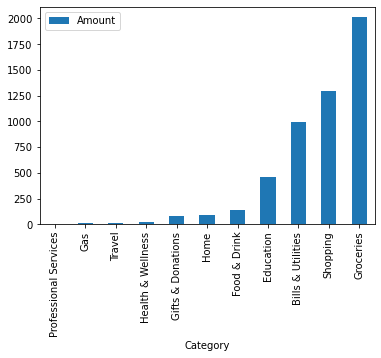

In [6]:
data1[['Amount', 'Category']].groupby('Category').sum().sort_values(by='Amount').plot(kind='bar')

In [7]:
data1.Description = data1.Description.apply(lambda x: x.lower())

<AxesSubplot:xlabel='month'>

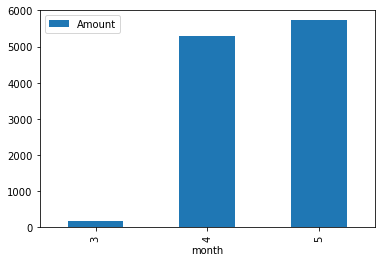

In [12]:
data1[['Amount', 'month']].groupby('month').sum().sort_values(by='Amount').plot(kind='bar')



In [58]:
def expense_types_by_month(data):
    '''returns a stacked bar chart grouping expenses by month and category'''
    
    categories = data['Category'].value_counts().index
    
    amounts = []
    
    for category in categories:
        x = list(data1[data1['Category']==category][['Amount', 'month']].groupby('month').sum().sort_values(by='month').index)
        y = np.array(data1[data1['Category']==category][['Amount', 'month']].groupby('month').sum().sort_values(by='month').values.reshape(1,-1)[0])
        amounts.append(y)
        
        if len(amounts)>1:
            plt.bar(x, amounts[-1], bottom=sum(amounts[:-1]))
        else:
            plt.bar(x, amounts[0])
    
    plt.ylabel('Amount Spent - USD')
    plt.xlabel('Month')
    plt.legend()
    
    
    

ValueError: shape mismatch: objects cannot be broadcast to a single shape

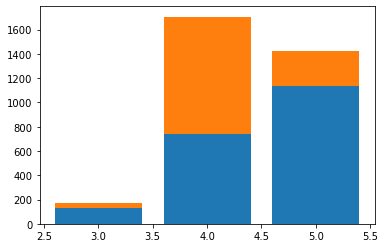

In [59]:
expense_types_by_month(data1)

<BarContainer object of 3 artists>

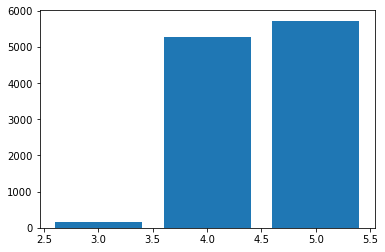

In [23]:
x = list(data1[['Amount', 'month']].groupby('month').sum().sort_values(by='Amount').index)

= data1[['Amount', 'month']].groupby('month').sum().sort_values(by='Amount').values.reshape(1,-1)[0]

plt.bar(x, y)

In [113]:
def desc_sorter(desc):
    '''Sorts expenses based on store titles'''
    chars = '*#.0123456789'

    for i in range(len(desc)):
        if desc[i] in chars:
            desc = desc[:i]
            break

In [114]:
test = ['hey', 'w3wsss', 'ww#2']

In [115]:
test

['hey', 'w3wsss', 'ww#2']

In [100]:
data1.Description.value_counts()

meijer # 182                 22
angelo caputo's fre           3
automatic payment - thank     2
icp*goldfish swim school      2
the fresh market 059          2
amzn mktp us                  2
city of st. charles           2
blue goose supermar           2
sprint *wireless              2
st patrick church             2
lowes #01738*                 2
walgreens #6795               2
dairy queen #15200            1
audible*2r0ss94n2             1
amzn mktp us*az9ro3i43        1
frankys red hots              1
amazon.com*c18q21mn3          1
7-eleven 33850                1
amazon.com*2p2jg51x3          1
amzn mktp us*t93pa8c53        1
amzn mktp us*986od8rq3        1
lakeshore recycling syst      1
amazon.com*2r7lj5zl2          1
amzn mktp us*2r49z1ct1        1
kindle unltd*td1we2203        1
amazon.com*n46s530e3          1
amzn mktp us*2l5zi1600        1
amzn mktp us*ky02f6ad3        1
amzn mktp us*hs1ax0273        1
chipotle 3849                 1
amzn mktp us*ae6fw2r83        1
kindle u